In [1]:
import activation
import loss
from network import Network
from optimizer import Optimizer

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nn = Network([4, 1], [activation.Identity], loss.MSE)

In [4]:
data = np.random.rand(1000, 4)
labels = np.sum(data, axis = 1)[np.newaxis].T

In [5]:
losses = nn.train(data, labels, Optimizer.AdaDelta, 0.03)

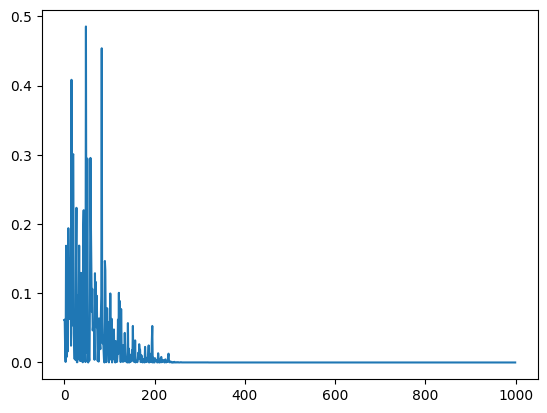

In [6]:
plt.plot(losses)
plt.show()

In [7]:
input = np.random.rand(1, 4)
input

array([[0.44972658, 0.49730535, 0.49094415, 0.55474798]])

In [8]:
np.sum(input)

1.992724048762055

In [9]:
nn.predict(input)

array([[[1.99272405]]])

In [10]:
nagnn = Network([4, 1], [activation.Identity], loss.MSE)

In [11]:
naglosses = nagnn.train(data, labels, Optimizer.NAG, 0.03)

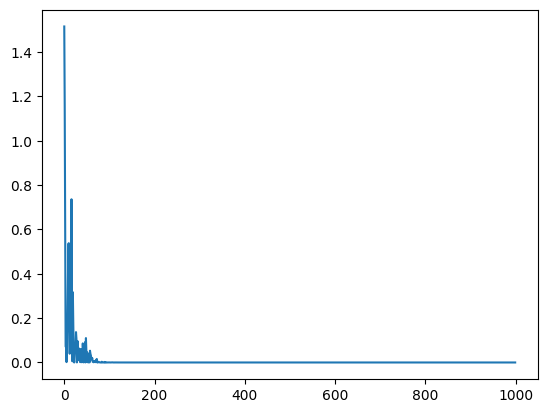

In [12]:
plt.plot(naglosses)
plt.show()

In [13]:
nagnn.predict(input)

array([[[1.99272405]]])

In [14]:
adamnn = Network([4, 1], [activation.Identity], loss.MSE)

In [15]:
adamlosses = adamnn.train(data, labels, Optimizer.AdaM, 0.03)

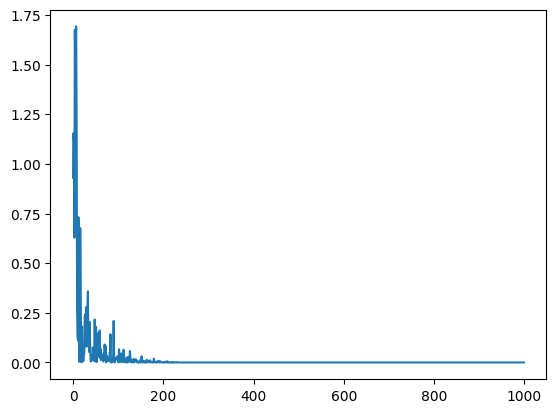

In [16]:
plt.plot(adamlosses)
plt.show()

Testing Performance on Cross Product

In [17]:
data = np.random.rand(1000000, 6)
l, r = np.hsplit(data, 2)
labels = np.cross(l, r, axis = 1)

In [18]:
adamcrossnn = Network([6, 12, 12, 6, 3], [activation.LeakyRelu, activation.LeakyRelu, activation.LeakyRelu, activation.Identity], loss.MSE)

In [19]:
adamcrosslosses = adamcrossnn.train(data, labels, Optimizer.AdaM, 0.03)

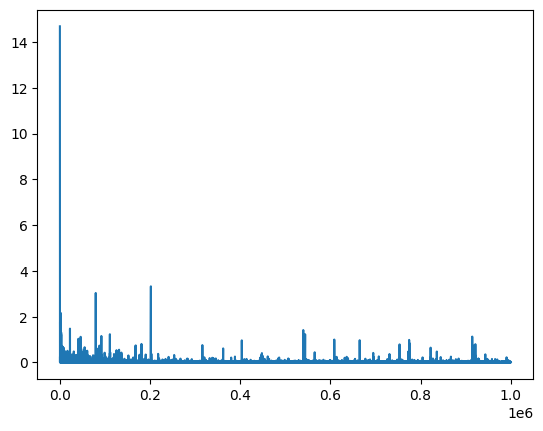

In [20]:
plt.plot(adamcrosslosses)
plt.show()

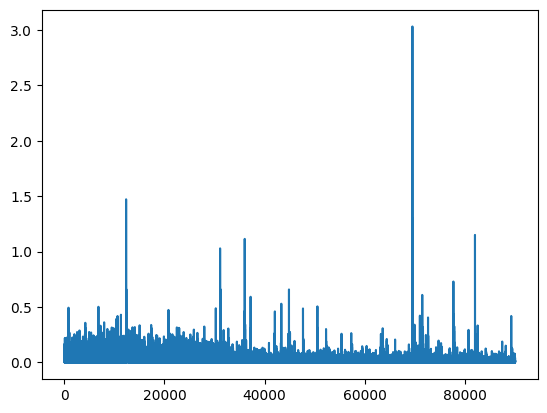

In [21]:
plt.plot(adamcrosslosses[10000:100000])
plt.show()

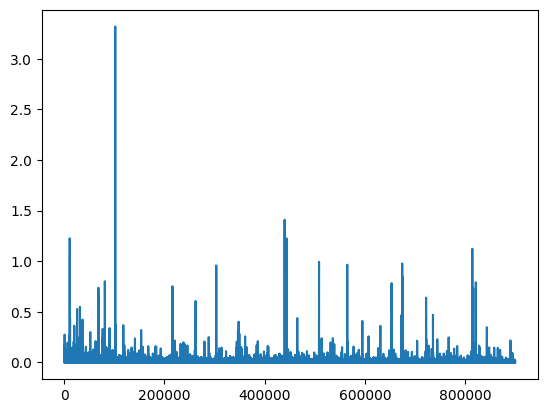

In [22]:
plt.plot(adamcrosslosses[100000:1000000])
plt.show()

In [23]:
vecs = np.random.rand(1, 6)
lvec, rvec = np.hsplit(vecs, 2)

In [24]:
np.cross(lvec, rvec)

array([[-0.22045972, -0.04501564,  0.14275939]])

In [25]:
adamcrossnn.predict(vecs)

array([[[-0.23169726],
        [-0.01902009],
        [ 0.14033486]]])

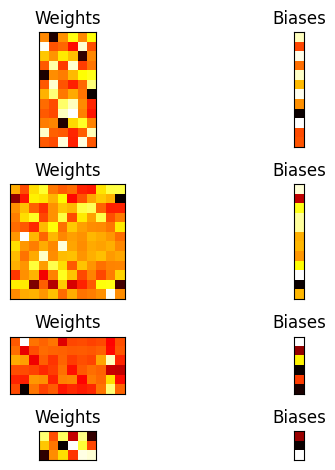

In [26]:
adamcrossnn.visualize()

In [27]:
adamcrossnn.write_to("AdamCrossNN")

In [28]:
copy = Network.read("AdamCrossNN")

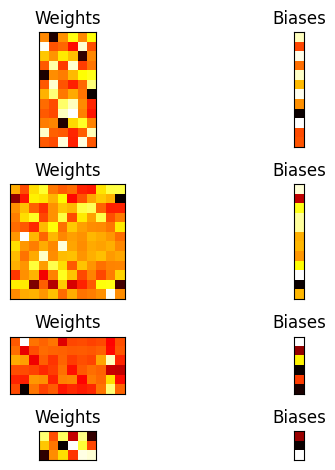

In [29]:
copy.visualize()